<a href="https://colab.research.google.com/github/tabaraei/CheatSheet/blob/master/notebooks/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Getting Started

In [32]:
import torch
import numpy as np

# Check if GPU is available
torch.cuda.is_available()

True

In [33]:
x = torch.tensor([1])
print(x.device)
x = x.to('cuda')
print(x.device)
y = torch.tensor([1], device='cuda')
print(y.device)

cpu
cuda:0
cuda:0


### Define Tensors

In [34]:
torch.tensor([1,2,3])

tensor([1, 2, 3])

In [35]:
torch.zeros(2,3, dtype=torch.int32), \
torch.ones(2), \
torch.empty(2), \
torch.rand(2)

(tensor([[0, 0, 0],
         [0, 0, 0]], dtype=torch.int32),
 tensor([1., 1.]),
 tensor([1.2187e-35, 3.0736e-41]),
 tensor([0.5042, 0.8481]))

In [36]:
array = np.array([1,2,3])
torch.from_numpy(array), \
torch.tensor(array), \
torch.tensor(array).numpy()
# Careful that modifying numpy array will affect tensor and vice versa

(tensor([1, 2, 3]), tensor([1, 2, 3]), array([1, 2, 3]))

### Mathematical Operations with Tensors

In [37]:
t1 = torch.ones(3)
t2 = torch.tensor([1,2.,3]) # dtype of all values will be the same
t2, t2.shape, t2.dtype, t2.size()

(tensor([1., 2., 3.]), torch.Size([3]), torch.float32, torch.Size([3]))

In [38]:
# Note: every function with underscore inplaces value
# main operations are: add, sub, mul, div
t1 + t2, torch.add(t1, t2), t2.add_(t1)

(tensor([2., 3., 4.]), tensor([2., 3., 4.]), tensor([2., 3., 4.]))

### Slicing within Tensors

In [39]:
t1 = torch.rand(3,4)
t1, t1[:,1], t1[1:3, 1:4], t1[0, 0].item()

(tensor([[0.6142, 0.7046, 0.1765, 0.6254],
         [0.9973, 0.2037, 0.1357, 0.1124],
         [0.7908, 0.8713, 0.9119, 0.1870]]),
 tensor([0.7046, 0.2037, 0.8713]),
 tensor([[0.2037, 0.1357, 0.1124],
         [0.8713, 0.9119, 0.1870]]),
 0.6141610145568848)

### Reshaping Tensors

In [40]:
t1 = torch.rand(16)
t1.view(-1, 8)

tensor([[0.0073, 0.4726, 0.5003, 0.3246, 0.0545, 0.1721, 0.2340, 0.5409],
        [0.8084, 0.4943, 0.6533, 0.0658, 0.4175, 0.9206, 0.1885, 0.9820]])

### Gradients

In [41]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)

# forward pass
y_hat = w*x
loss = (y_hat - y)**2
print(loss)

# backward pass
loss.backward()
print(w.grad)

# x.requires_grad_(False)
# use x.grad.zero_() at the end of loops!

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


### Linear Regression

In [42]:
# model selection and params
# loss function and optimizer
# Training loop:
# - forward pass
# - backward pass
# - update weights

In [43]:
# Simplest Solution Without Using AutoGrad

import numpy as np

X = np.array([1,2,3,4], dtype=np.float32)
Y = np.array([2,4,6,8], dtype=np.float32)
W = 0.0

# model prediction: f = x * w
def forward(x):
  return W * x

# loss: MSE = 1/N (wx - y)^2
def loss(y, y_pred):
  return ((y - y_pred)**2).mean()

# gradient: grad = 1/N 2x (wx - y)
def gradient(x, y, y_pred):
  return np.dot(2*x, y_pred-y).mean()

print(f'prediction before training: {forward(5)}')

# training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
  y_pred = forward(X)
  err = loss(Y, y_pred)
  dw = gradient(X, Y, y_pred)
  W -= learning_rate*dw

  if epoch % 2 == 0:
    print(f'epoch {epoch+1}: , w = {W}, loss = {err}')

prediction before training: 0.0
epoch 1: , w = 1.2, loss = 30.0
epoch 3: , w = 1.871999988555908, loss = 0.7680001854896545
epoch 5: , w = 1.9795200133323667, loss = 0.019660834223031998
epoch 7: , w = 1.9967231869697568, loss = 0.0005033080233260989
epoch 9: , w = 1.999475698471069, loss = 1.2884394891443662e-05
epoch 11: , w = 1.9999160599708554, loss = 3.297340072094812e-07
epoch 13: , w = 1.9999865984916685, loss = 8.487816671731707e-09
epoch 15: , w = 1.9999978351593015, loss = 2.1679014139408537e-10
epoch 17: , w = 1.9999996304512022, loss = 5.076827847005916e-12
epoch 19: , w = 1.9999999165534972, loss = 1.3145040611561853e-13


In [44]:
# Using Backward AutoGrad

import torch

X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)
W = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction: f = x * w
def forward(x):
  return W * x

# loss: MSE = 1/N (wx - y)^2
def loss(y, y_pred):
  return ((y - y_pred)**2).mean()

print(f'prediction before training: {forward(5)}')

# training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
  y_pred = forward(X)
  err = loss(Y, y_pred)
  err.backward()
  with torch.no_grad():
    W -= learning_rate*W.grad

  W.grad.zero_()
  if epoch % 10 == 0:
    print(f'epoch {epoch+1}: , w = {W}, loss = {err}')

prediction before training: 0.0
epoch 1: , w = 0.29999998211860657, loss = 30.0
epoch 11: , w = 1.6653136014938354, loss = 1.1627856492996216
epoch 21: , w = 1.934108853340149, loss = 0.0450688973069191
epoch 31: , w = 1.987027645111084, loss = 0.0017468547448515892
epoch 41: , w = 1.9974461793899536, loss = 6.770494655938819e-05
epoch 51: , w = 1.9994971752166748, loss = 2.6243997126584873e-06
epoch 61: , w = 1.9999010562896729, loss = 1.0175587306093803e-07
epoch 71: , w = 1.9999804496765137, loss = 3.9741685498029256e-09
epoch 81: , w = 1.999996304512024, loss = 1.4670220593870908e-10
epoch 91: , w = 1.9999992847442627, loss = 5.076827847005916e-12


In [45]:
# With Predefined Optimizer and Loss Funcionts

import torch
import torch.nn as nn

X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)
W = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction: f = x * w
def forward(x):
  return W * x

# loss: MSE = 1/N (wx - y)^2
loss = nn.MSELoss()

print(f'prediction before training: {forward(5)}')

# training
learning_rate = 0.01
n_iters = 100
optimizer = torch.optim.SGD([W], lr=learning_rate)

for epoch in range(n_iters):
  y_pred = forward(X)
  err = loss(Y, y_pred)
  err.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch % 10 == 0:
    print(f'epoch {epoch+1}: , w = {W}, loss = {err}')

prediction before training: 0.0
epoch 1: , w = 0.29999998211860657, loss = 30.0
epoch 11: , w = 1.6653136014938354, loss = 1.1627856492996216
epoch 21: , w = 1.934108853340149, loss = 0.0450688973069191
epoch 31: , w = 1.987027645111084, loss = 0.0017468547448515892
epoch 41: , w = 1.9974461793899536, loss = 6.770494655938819e-05
epoch 51: , w = 1.9994971752166748, loss = 2.6243997126584873e-06
epoch 61: , w = 1.9999010562896729, loss = 1.0175587306093803e-07
epoch 71: , w = 1.9999804496765137, loss = 3.9741685498029256e-09
epoch 81: , w = 1.999996304512024, loss = 1.4670220593870908e-10
epoch 91: , w = 1.9999992847442627, loss = 5.076827847005916e-12


In [46]:
# With Predefined Models, or Class Models

import torch
import torch.nn as nn

X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)
X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape

# # We could use a model class
# class LinearRegression(nn.Module):
#   def __init__(self, input_dim, output_dim):
#     super(LinearRegression, self).__init__()
#     # define layers
#     self.lin= nn.Linear(input_dim, output_dim)
#   def forward(self, x):
#     return self.lin(x)
# model = LinearRegression(n_features, n_features)

# or use defined models
model = nn.Linear(in_features=n_features, out_features=n_features)

loss = nn.MSELoss()
learning_rate = 0.01
n_iters = 2800
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print(f'prediction before training: {model(X_test).item()}')
for epoch in range(n_iters):
  y_pred = model(X)
  err = loss(Y, y_pred)
  err.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch % (n_iters/10) == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0,0].item():.3f}, b = {b[0].item():.3f}, loss = {err:.3f}, pred = {model(X_test).item():.3f}')

prediction before training: -3.780319929122925
epoch 1: w = -0.336, b = 0.106, loss = 57.148, pred = -1.572
epoch 281: w = 1.881, b = 0.348, loss = 0.020, pred = 9.756
epoch 561: w = 1.949, b = 0.151, loss = 0.004, pred = 9.895
epoch 841: w = 1.978, b = 0.065, loss = 0.001, pred = 9.954
epoch 1121: w = 1.990, b = 0.028, loss = 0.000, pred = 9.980
epoch 1401: w = 1.996, b = 0.012, loss = 0.000, pred = 9.992
epoch 1681: w = 1.998, b = 0.005, loss = 0.000, pred = 9.996
epoch 1961: w = 1.999, b = 0.002, loss = 0.000, pred = 9.998
epoch 2241: w = 2.000, b = 0.001, loss = 0.000, pred = 9.999
epoch 2521: w = 2.000, b = 0.000, loss = 0.000, pred = 10.000


Features shape: [100, 1], Classes shape: [100, 1]
epoch 1: w = 1.850, b = 0.758, loss = 5662.661, pred = 10.009
epoch 31: w = 52.059, b = 5.237, loss = 1107.981, pred = 265.531
epoch 61: w = 71.161, b = 5.186, loss = 440.057, pred = 360.989
epoch 91: w = 78.252, b = 4.668, loss = 347.688, pred = 395.926
epoch 121: w = 80.897, b = 4.337, loss = 334.711, pred = 408.823
epoch 151: w = 81.888, b = 4.175, loss = 332.873, pred = 413.614
epoch 181: w = 82.260, b = 4.103, loss = 332.611, pred = 415.403
epoch 211: w = 82.400, b = 4.074, loss = 332.574, pred = 416.073
epoch 241: w = 82.453, b = 4.062, loss = 332.568, pred = 416.324
epoch 271: w = 82.472, b = 4.057, loss = 332.568, pred = 416.419


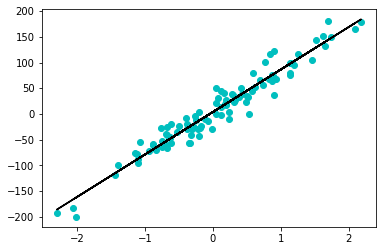

In [47]:
# All in One

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Prepare Data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32)).view(y_numpy.shape[0], 1)
X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape
print(f'Features shape: {list(X.shape)}, Classes shape: {list(y.shape)}')

# Model and Optimizer Selection
model = nn.Linear(in_features=n_features, out_features=n_features)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.5)
loss = nn.MSELoss()
learning_rate = 0.01
n_iters = 300

# Training Loop
for epoch in range(n_iters):
  y_pred = model(X)
  err = loss(y_pred, y)
  err.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch % (n_iters/10) == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0,0].item():.3f}, b = {b[0].item():.3f}, loss = {err:.3f}, pred = {model(X_test).item():.3f}')

# Plot
predicted = model(X).detach().numpy()
_ = plt.plot(X_numpy, y_numpy, 'co')
_ = plt.plot(X_numpy, predicted, 'k')

### Logistic Regression

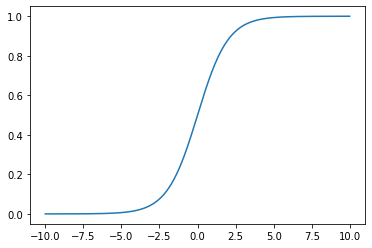

In [48]:
import matplotlib.pyplot as plt
import numpy as np

y = np.arange(-10,10,0.01)
x = torch.tensor(y)
z = torch.sigmoid(x)
plt.plot(y,z)

In [49]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Load and Split the Data
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = \
  train_test_split(X, y, train_size=0.8, random_state=1)
n_features = X.shape[1]

# Preview the Data
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df

# Preprocess the Data
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

# Prepare the Data
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).view(y_train.shape[0], 1)
y_test = torch.from_numpy(y_test.astype(np.float32)).view(y_test.shape[0], 1)

# Model Selection
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred
model = LogisticRegression(n_features)

# Loss and Optimizer
learning_rate = 0.01
n_iters = 1000
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training Loop
for epoch in range(n_iters):
  y_pred = model(X_train)
  err = criterion(y_pred, y_train)
  err.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch % (n_iters/10) == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: loss = {err.item():.3f}')

with torch.no_grad():
  y_pred_test = model(X_test)
  y_pred_test = y_pred_test.round()
  accuracy1 = y_pred_test.eq(y_test).sum() / float(y_test.shape[0])
  accuracy2 = accuracy_score(y_pred_test, y_test)
  print(f'Accuracy = {accuracy1:.4f}, {accuracy2:.4f}')

epoch 1: loss = 0.662
epoch 101: loss = 0.243
epoch 201: loss = 0.182
epoch 301: loss = 0.155
epoch 401: loss = 0.138
epoch 501: loss = 0.127
epoch 601: loss = 0.119
epoch 701: loss = 0.113
epoch 801: loss = 0.108
epoch 901: loss = 0.104
Accuracy = 0.9561, 0.9561


### Dataset, DataLoader, and Batches

In [50]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math



class WineDataset(Dataset):
  def __init__(self):
    self.url = 'https://raw.githubusercontent.com/python-engineer/pytorchTutorial/master/data/wine/wine.csv'
    self.data = np.loadtxt(self.url, delimiter=',', dtype=np.float32, skiprows=1)
    self.X = torch.from_numpy(self.data[:, 1:])
    self.y = torch.from_numpy(self.data[:, [0]])
    self.n_samples = self.data.shape[0]

  def __getitem__(self, index):
    return self.X[index], self.y[index]

  def __len__(self):
    return self.n_samples

batch_size = 4
n_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/batch_size)
dataset = WineDataset()
dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# training loop
for epoch in range(n_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    # forward backward update
    if (i+1) % 5 == 0:
      print(f'epoch {epoch+1}/{n_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')


epoch 1/2, step 5/2, inputs torch.Size([4, 13])
epoch 1/2, step 10/2, inputs torch.Size([4, 13])
epoch 1/2, step 15/2, inputs torch.Size([4, 13])
epoch 1/2, step 20/2, inputs torch.Size([4, 13])
epoch 1/2, step 25/2, inputs torch.Size([4, 13])
epoch 1/2, step 30/2, inputs torch.Size([4, 13])
epoch 1/2, step 35/2, inputs torch.Size([4, 13])
epoch 1/2, step 40/2, inputs torch.Size([4, 13])
epoch 1/2, step 45/2, inputs torch.Size([2, 13])
epoch 2/2, step 5/2, inputs torch.Size([4, 13])
epoch 2/2, step 10/2, inputs torch.Size([4, 13])
epoch 2/2, step 15/2, inputs torch.Size([4, 13])
epoch 2/2, step 20/2, inputs torch.Size([4, 13])
epoch 2/2, step 25/2, inputs torch.Size([4, 13])
epoch 2/2, step 30/2, inputs torch.Size([4, 13])
epoch 2/2, step 35/2, inputs torch.Size([4, 13])
epoch 2/2, step 40/2, inputs torch.Size([4, 13])
epoch 2/2, step 45/2, inputs torch.Size([2, 13])


### Dataset Transformations (Skipped)
[Follow Here](https://www.youtube.com/watch?v=c36lUUr864M&t=8008s)

### Softmax and Sigmoid

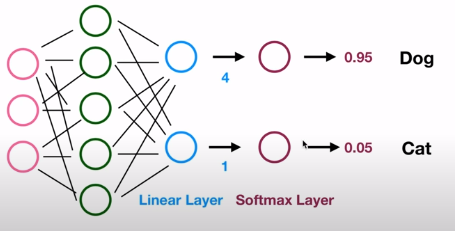

In [51]:
import torch
import torch.nn as nn

# Multi-Class Classification
# Softmax will calculate the probability based on input values
# Sum of the values equals to 1 
# use nn.CrossEntropyLoss()
x = torch.tensor([2.0, 1.0, 0.1])
z = torch.softmax(x, dim=0)
z

tensor([0.6590, 0.2424, 0.0986])

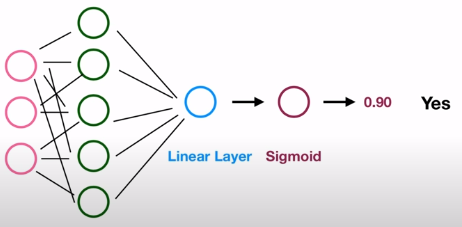

In [52]:
import torch
import torch.nn as nn

# Binacry Classification
# Output above 0.5 is considered to be True
# use Binary-Class Entropy nn.BCELoss()
x = torch.tensor([2.0, 1.0, 0.1])
z = torch.sigmoid(x)
z

tensor([0.8808, 0.7311, 0.5250])

### Activation Functions

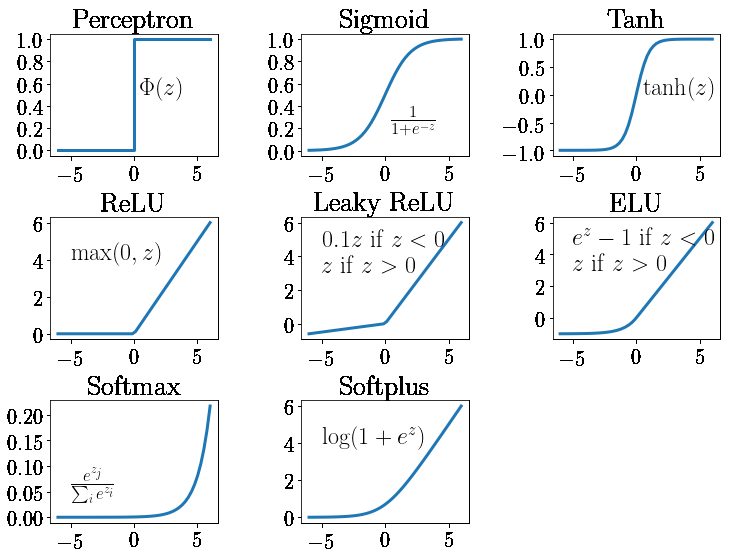

- **Perceptron (Step):** Not used anymore
- **Sigmoid:** Last layer of a binary classification problem
- **Tanh:** Hidden Layers
- **ReLU:** Very good for hidden layers
- **Leaky ReLU:** Solves the vanishing gradient problem
- **Softmax:** Last layer of a multi-class classification problem 

### Neural Network

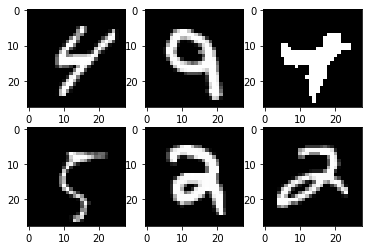

epoch 1/2, step 100/600, loss = 0.3002
epoch 1/2, step 200/600, loss = 0.3073
epoch 1/2, step 300/600, loss = 0.2544
epoch 1/2, step 400/600, loss = 0.3819
epoch 1/2, step 500/600, loss = 0.3217
epoch 1/2, step 600/600, loss = 0.2497
epoch 2/2, step 100/600, loss = 0.1954
epoch 2/2, step 200/600, loss = 0.2829
epoch 2/2, step 300/600, loss = 0.1861
epoch 2/2, step 400/600, loss = 0.1334
epoch 2/2, step 500/600, loss = 0.0852
epoch 2/2, step 600/600, loss = 0.1702
Accuracy of the network on the 10000 test images = 95.28


In [53]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # images of 28x28
hidden_size = 100
n_classes = 10
n_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST Dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, 
  transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, 
  transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
  batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
  batch_size=batch_size, shuffle=False)

# Data Preview
examples = iter(train_loader)
samples, labels = examples.next()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, n_classes):
    super(NeuralNet, self).__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.layer2 = nn.Linear(hidden_size, n_classes)

  def forward(self, x):
    out = self.layer1(x)
    out = self.relu(out)
    out = self.layer2(out)
    # No need for softmax, because CrossEntropy does it automatically
    return out

model = NeuralNet(input_size, hidden_size, n_classes).to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training Loop
n_total_steps  = len(train_loader)
for epoch in range(n_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # Reshape images
    images = images.reshape(-1, input_size).to(device)
    labels = labels.to(device)

    # Forward
    y_pred = model(images)
    err = criterion(y_pred, labels)

    # Backward
    optimizer.zero_grad()
    err.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch {epoch+1}/{n_epochs}, step {i+1}/{n_total_steps}, loss = {err.item():.4f}')

# Test (we don't need to compute gradients for memory efficiency)
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, input_size).to(device)
    labels = labels.to(device)
    y_pred = model(images)
    _, predictions = torch.max(y_pred, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()
  
  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the network on the 10000 test images = {acc}')